<font color='blue'> First of all, please “Copy to Drive” to get your own copy for editing. </font>

<font color='red'> Run all the cells. Finish the task(s) near the end of this notebook. Start to think about your term project! </font>

# scikit-learn: intro to machine learning (ML)

**scikit-learn** (https://scikit-learn.org/stable/) is one of the most widely used and trusted general-purpose Python machine learning toolkits.

Scikit-learn contains a broad selection of standard supervised and unsupervised machine learning methods, with tools for model selection and evaluation, data transformation, data loading, and model persistence. These models can be used for classification, clustering, prediction, and other common tasks.

As an example let's use a dataset from a Kaggle competition about **passenger survival rates on the Titanic in 1912**:

## Challenge

Build a predictive model that answers the question: "what sorts of people were more likely to survive the Titanic sinking?"

https://www.kaggle.com/competitions/titanic


## Data
To take a look at the competition data, click on the Data tab at the top of the competition page. Then, scroll down to find the list of files.
There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

| Column Name - customers.csv | Description |
|:--|:--|
| Survival | Survival (0 = No; 1 = Yes). Not included in test.csv file |
| Pclass |  Ticket Class/ A Proxy for socio-economic status(SES) (1 = 1st/Upper ; 2 = 2nd/Middle; 3 = 3rd/Lower) |
| Name | Name |
| Sex | Sex |
| Age | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 |
| Sibsp | Number of Siblings (brother, sister, stepbrother, stepsister) /Spouses (husband, wife (mistresses and fiancés were ignored)) Aboard |
| Parch | Number of Parents (mother, father)/Children (daughter, son, stepdaughter, stepson) Aboard; Some children travelled only with a nanny, therefore parch=0 for them. |
| Ticket | Ticket Number |
| Fare | Passenger Fare |
| Cabin | Cabin |
| Embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) |


In [1]:
# linear algebra
import numpy as np
# Get the data
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In statistics and machine learning examples like this one, a typical task is to predict whether a passenger would survive based on features in the data. A model is fitted on a **training dataset** and then evaluated on an out-of-sample **testing dataset**.

<a id="ch1"></a>
### 1. Question or problem definition

The competition is simple: Use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.



In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/Data

#### Get the data

In [5]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 11 features and one target variable (survived).


In [7]:
# Descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.shape, test.shape

((891, 12), (418, 11))


The values in the second column (**"Survived"**) can be used to determine whether each passenger survived or not:

- if it's a "1", the passenger survived.
- if it's a "0", the passenger died.

<a id=""></a>
### 2. Wrangle, prepare, clean the data

---- Start the data cleaning----

We need to make sure the data is clean before starting your analysis. Let's try these:

- Duplicate records
- Missing values
- How to handle missing values
- Drop Useless Column

#### Duplicate Records
How many duplicate transaction records are there?

In [11]:
#Find the number duplicate record
print('training set - Number of duplicate Record:', train.duplicated().sum())

print('testing set - Number of duplicate Record:', test.duplicated().sum())

training set - Number of duplicate Record: 0
testing set - Number of duplicate Record: 0


#### Missing Values
How many missing values are there?

Libraries like scikit-learn generally **cannot be fed missing data**, so we look at the columns to see if there are any that contain missing data:

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font color='blue'> There are misssing values in Age, Cabin and Embarked.

In [13]:
combine = [train, test]

#### Handle missing value - continuous variable

Let's use `Age` as a predictor, but it has missing data. There are a number of ways to do missing data imputation, but let's do a simple one and use the median of the training dataset to fill the nulls in both tables:

In [14]:
impute_value = train['Age'].median()

for dataset in combine:
  dataset['Age'] = dataset['Age'].fillna(impute_value)

In [ ]:
# train['Age'] = train['Age'].fillna(impute_value)

In [ ]:
# test['Age'] = test['Age'].fillna(impute_value)

#### Handle missing value - categorical variable


Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [15]:
# Find the mode of train_df['Embarked']
freq_port = train.Embarked.dropna().mode()[0]
print('Mode of Embarked variable in training data: ',freq_port)

#Fill the null value of Embarked with the most common occurance

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train.head()

Mode of Embarked variable in training data:  S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.


In [16]:
#Converting categorical feature to numeric

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 1, "C": 2, "Q": 3})

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1



Let's start convert Sex feature to a new feature called Gender where female=1 and male=0.

In [17]:
# Convert Sex feature (female = 1, male =0)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


In [18]:
# train['IsFemale'] = (train['Sex'] == 'female').astype(int)

In [19]:
# test['IsFemale'] = (test['Sex'] == 'female').astype(int)

#### Drop Useless Column

The **Name, PassengerId**, **Ticket** and **Cabin** should not have a bearing on the analysis. We also do not need the PassengerId feature in the training dataset

In [20]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test = test.drop(['Name','Ticket','Cabin'], axis=1)

combine1 = [train, test]


In [21]:
#Binning variable - Fare & Age
for dataset in combine1:
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 4)

In [22]:
#code categorical data
label = LabelEncoder()
for dataset in combine1:
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [23]:
train = train.drop(['FareBin','AgeBin'], axis=1)
test = test.drop(['FareBin','AgeBin'], axis=1)

In [24]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBin_Code,FareBin_Code
0,0,3,0,22.0,1,0,7.2500,1,1,0
1,1,1,1,38.0,1,0,71.2833,2,1,3
2,1,3,1,26.0,0,0,7.9250,1,1,1
3,1,1,1,35.0,1,0,53.1000,1,1,3
4,0,3,0,35.0,0,0,8.0500,1,1,1


<font color='red'> Optional task: can you try OneHotEncode for 'AgeBin'feature or others? It's okay if you do not know how.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


<a id="ch3"></a>
### 3. Brief EDA (Exploratory Data Analysis)

- Female from Upper class is about 95-96% survived. Only 3 out of 94 Women from Upper class died.
- Female Upper class has high priority to survive
- Lower class female has more survived rate than Upper class male.

#### Features Correlation with Survived:

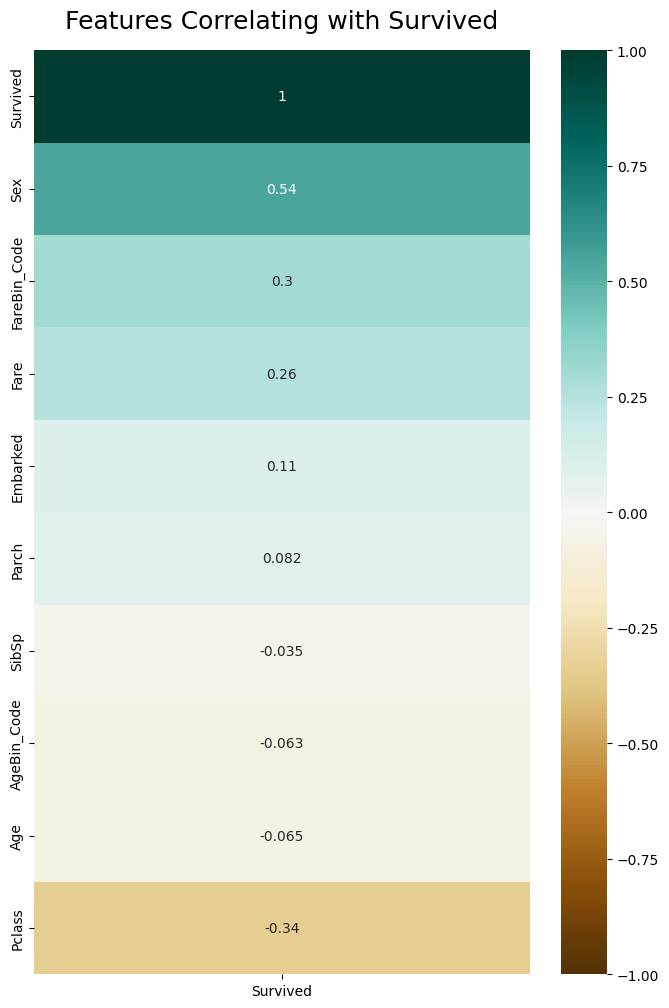

In [25]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);


- Sex is positively corrlated with Survived (with a Person's correlation coefficient of 0.54) ; Female is more likely to survive
- Pclass is negatively correlated with Survived(with a Pearson’s correlation coefficient of -0.34) ; Obviously, better the ticket class (1 = 1st/Upper ; 2 = 2nd/Middle; 3 = 3rd/Lower), higher the chance of survival.

- Those important feature for prediction the Survived people



#### Correlation between features:

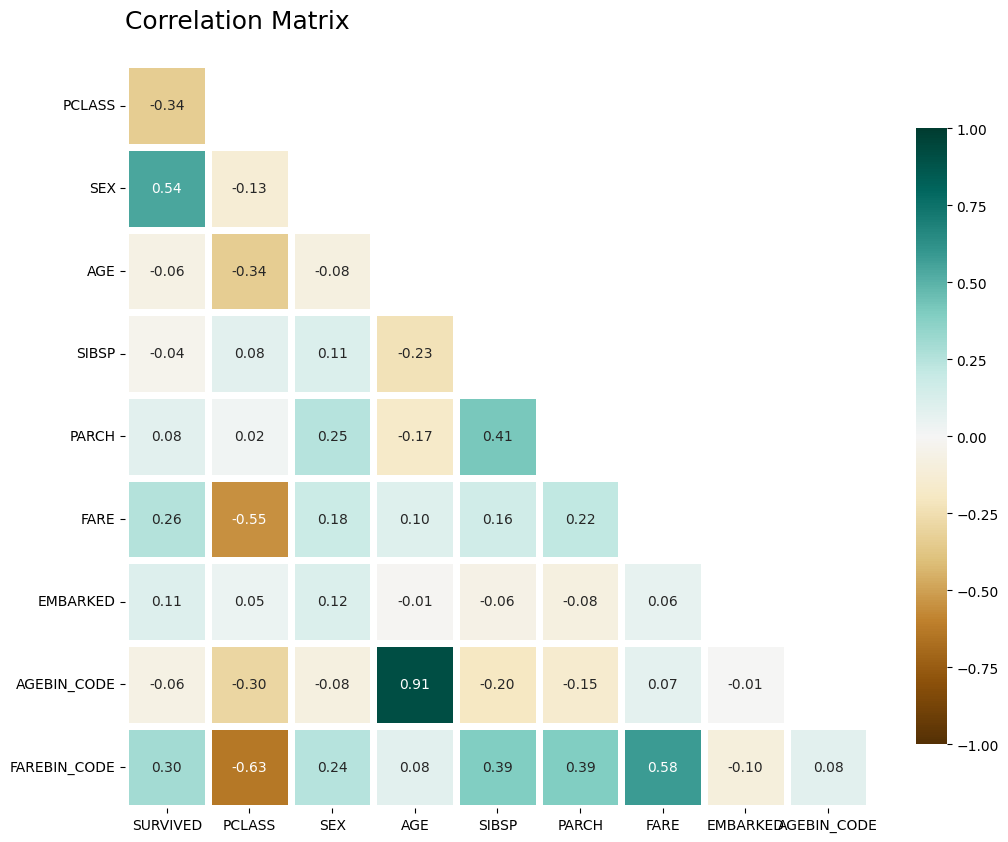

In [26]:
# get correlations
df_corr = train.corr()

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # Use bool instead of np.bool
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
# cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           linewidths=5, cmap='BrBG', vmin=-1, vmax=1,
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Correlation Matrix\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

According to the analysis, passengers were more likely to survive if:

- they had a high class ticket
- they were women
- they were young
- they embarked from Cherbourg



<a id="ch4"></a>
### 4. Acquire training and testing data

In [27]:
 X_train = train.drop(['Survived', 'Fare','AgeBin_Code'], axis=1)
 Y_train = train["Survived"]
 X_test  = test.drop(['PassengerId','Fare', 'AgeBin_Code'], axis=1).copy()
 X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

<a id="ch5"></a>
### 5. Model, predict and solve the problem

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification problem. Machine learning models include but not limited to:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Neural networks
* ...



    Please note that this is an example and it's not necessarily a good model

In [28]:
# from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Fit this model to the training data using the model's fit method:

In [29]:
model.fit(X_train, Y_train)   # model fitting

LogisticRegression()

Now, we can form predictions for the test dataset using model.predict():

In [30]:
y_predict = model.predict(X_test)  # model prediction
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

There are techniques such as cross-validation that can be used for parameter tuning to avoid overfitting to the training data. Some models, like logistic regression, have estimator classes with built-in cross-validation. For example, the **`LogisticRegressionCV`** class can be used with a parameter indicating how fine-grained of a grid search to do on the model regularization parameter `C`:

In [31]:
# from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(Cs=10)
model_cv.fit(X_train, Y_train)

LogisticRegressionCV()

To cross-validate our model with four nonoverlapping splits of the training data:

In [32]:
# from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10)
scores = cross_val_score(model, X_train, Y_train, cv=4)
scores

/workspaces/UF/padsenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.77578475, 0.8206278 , 0.75784753, 0.8018018 ])

<font color='red'> This is an open task/question: please try another machine learning model (e.g., Random Forest) and find a way to show the model performance. You can also do feature enginnering to improve your model performance.
* As long as you tried another machine learning model and showed model performance (even a very simple way), you get full credit for this task.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
